# **Credit Card Fraud Detection**


**1.   Data Preprocessing**

**2.   Exploratory Data Analysis**

**3.   Modeling**


*Credit to https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud for the dataset*


**1. Data Preprocessing**

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("creditcard.csv")
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

no null data

class is the target column with 0 = no fraud, 1 = fruad

In [6]:
data["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

the data is highly imbalanced as per the kaggle information

In [7]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


to understand the data, lets read the kaggle content description:

*  The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.
*  Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'.
*   Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset.
*   The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning.






In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
nofrauddata = data[data['Class'] == 0]
frauddata = data[data['Class'] == 1]

In [10]:
nofrauddata['Time'] = nofrauddata['Time'] / 3600
frauddata['Time'] = frauddata['Time'] / 3600

<ipython-input-10-e48fb40c0165>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nofrauddata['Time'] = nofrauddata['Time'] / 3600
<ipython-input-10-e48fb40c0165>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frauddata['Time'] = frauddata['Time'] / 3600


**2.   Exploratory Data Analysis**

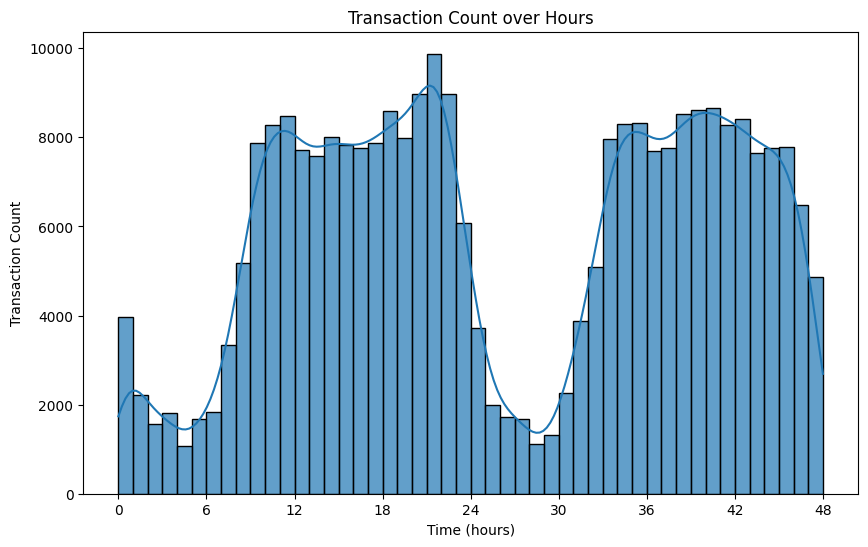

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(data=nofrauddata,x = 'Time', bins=48,  alpha = 0.7, kde = True)
plt.xlabel('Time (hours)')
plt.ylabel('Transaction Count')
plt.title('Transaction Count over Hours')
plt.xticks(range(0, 54,6))
plt.show()

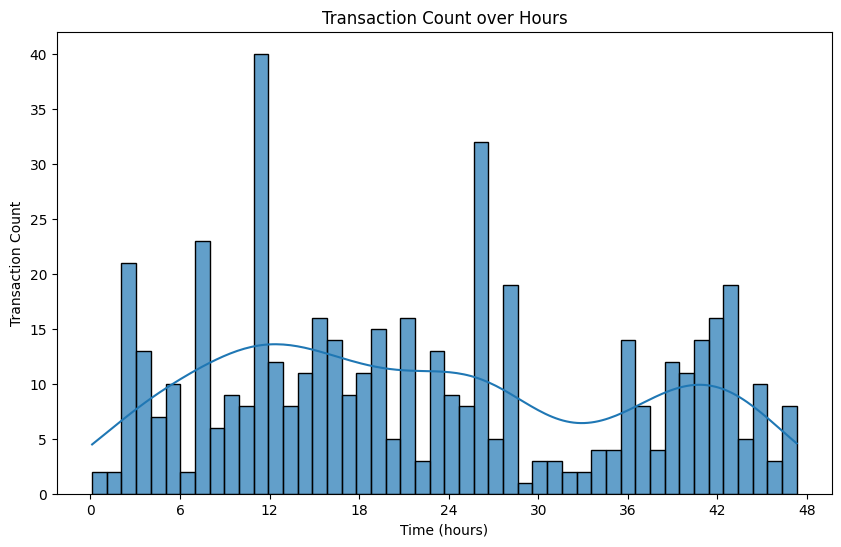

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(data=frauddata,x = 'Time', bins=48,  alpha = 0.7, kde = True)
plt.xlabel('Time (hours)')
plt.ylabel('Transaction Count')
plt.title('Transaction Count over Hours')
plt.xticks(range(0, 54,6))
plt.show()

with the nofraudddata, around 24 hours, there is a significant decline with transcations (as most people are sleeping). However with frauddata, there is a significant increase in the early 1-5 AM times as this is when most fraud occurs

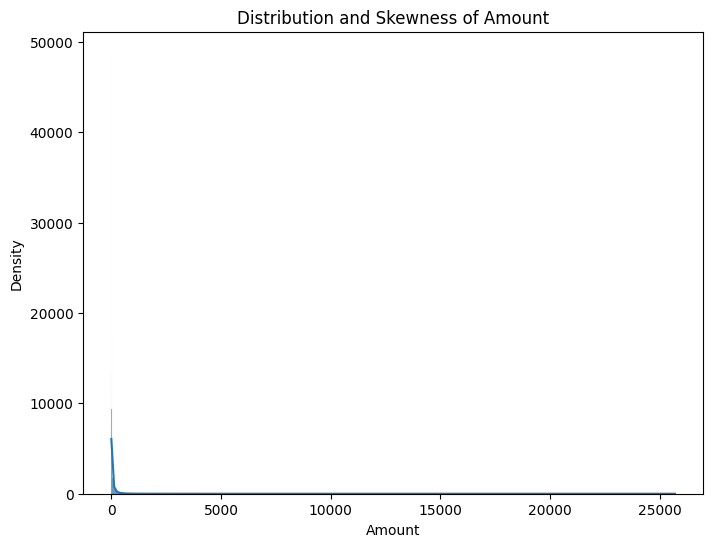

In [13]:
plt.figure(figsize = (8,6))
sns.histplot(data['Amount'], kde = True)
plt.xlabel('Amount')
plt.ylabel('Density')
plt.title('Distribution and Skewness of Amount')
plt.show()

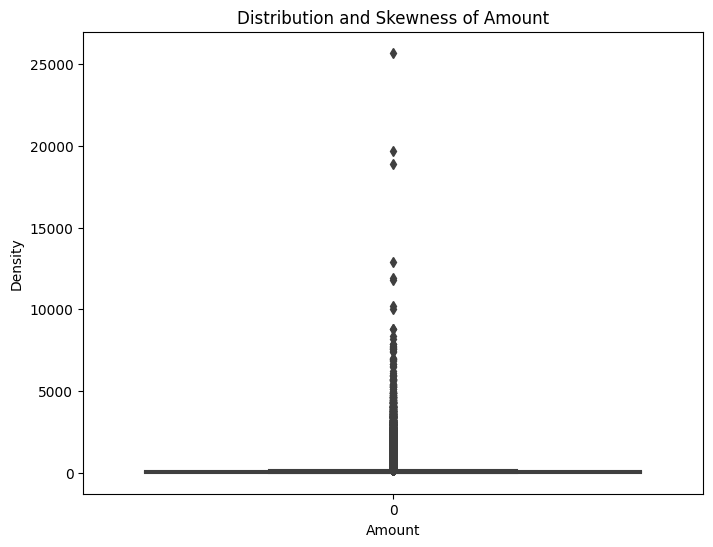

In [14]:
plt.figure(figsize = (8,6))
sns.boxplot(data['Amount'])
plt.xlabel('Amount')
plt.ylabel('Density')
plt.title('Distribution and Skewness of Amount')
plt.show()

In [15]:
import statsmodels.api as sm

<Figure size 800x600 with 0 Axes>

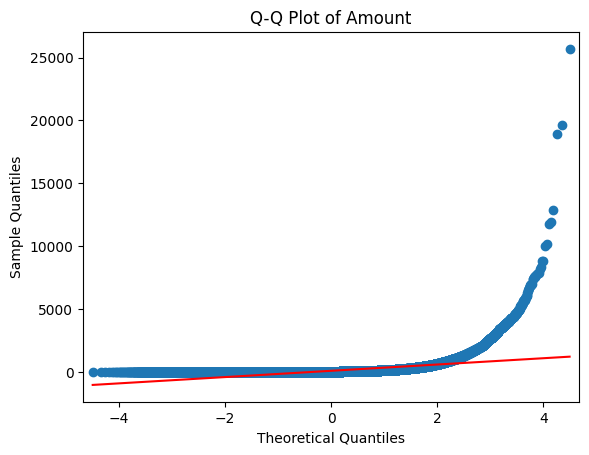

In [16]:
plt.figure(figsize = (8,6))
sm.qqplot(data['Amount'], line = 's')
plt.title('Q-Q Plot of Amount')
plt.show()

positive skewness (right skewed)

q-q plot indicates depature from normality

we have to deal with this or it can mislead our model

In [17]:
Q1 = data['Amount'].quantile(0.25)
Q3 = data['Amount'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

nofrauddata_out = nofrauddata[(nofrauddata['Amount'] >= lower_bound) & (nofrauddata['Amount'] <= upper_bound)]
data = pd.concat([nofrauddata_out, frauddata])

In [18]:
data["Class"].value_counts()

0    252502
1       492
Name: Class, dtype: int64

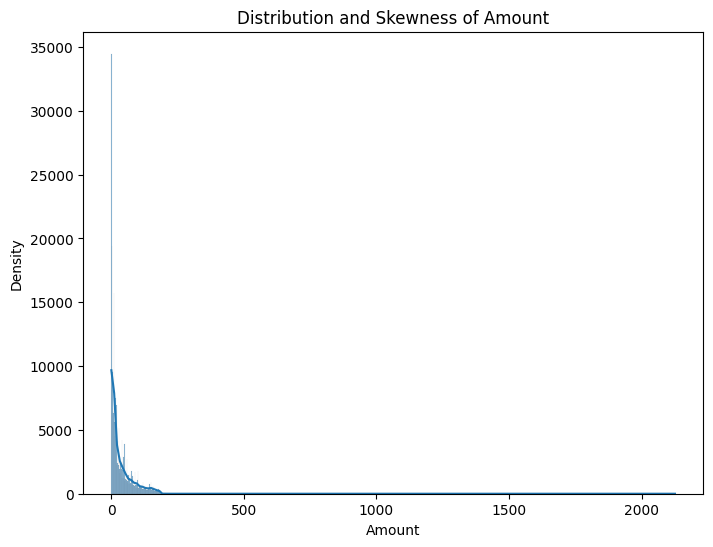

In [19]:
plt.figure(figsize = (8,6))
sns.histplot(data['Amount'], kde = True)
plt.xlabel('Amount')
plt.ylabel('Density')
plt.title('Distribution and Skewness of Amount')
plt.show()

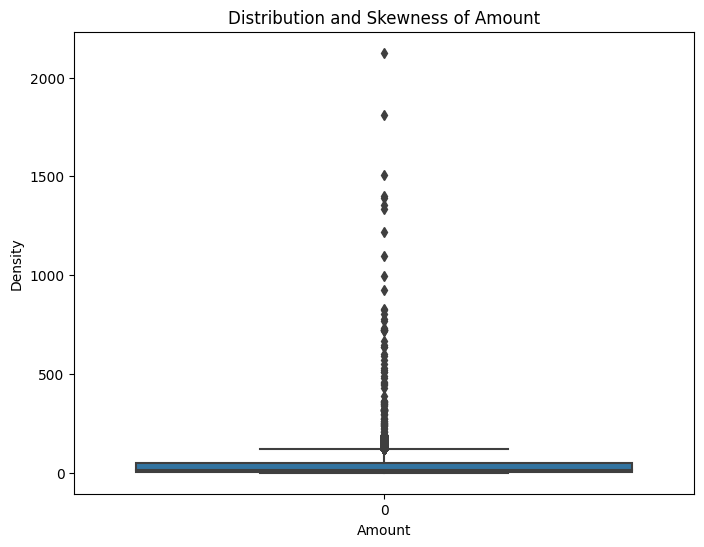

In [20]:
plt.figure(figsize = (8,6))
sns.boxplot(data['Amount'])
plt.xlabel('Amount')
plt.ylabel('Density')
plt.title('Distribution and Skewness of Amount')
plt.show()

<Figure size 800x600 with 0 Axes>

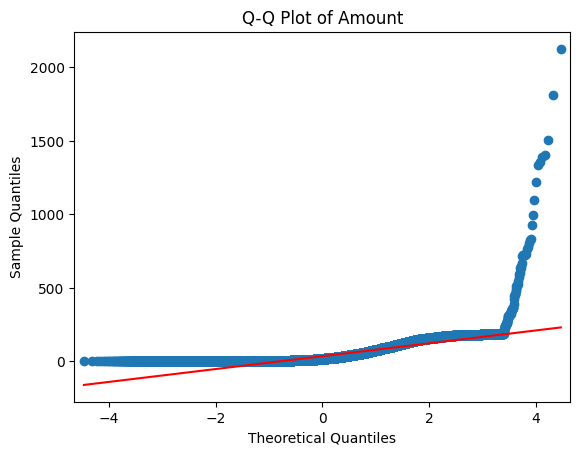

In [21]:
plt.figure(figsize = (8,6))
sm.qqplot(data['Amount'], line = 's')
plt.title('Q-Q Plot of Amount')
plt.show()

outliers dealt with.

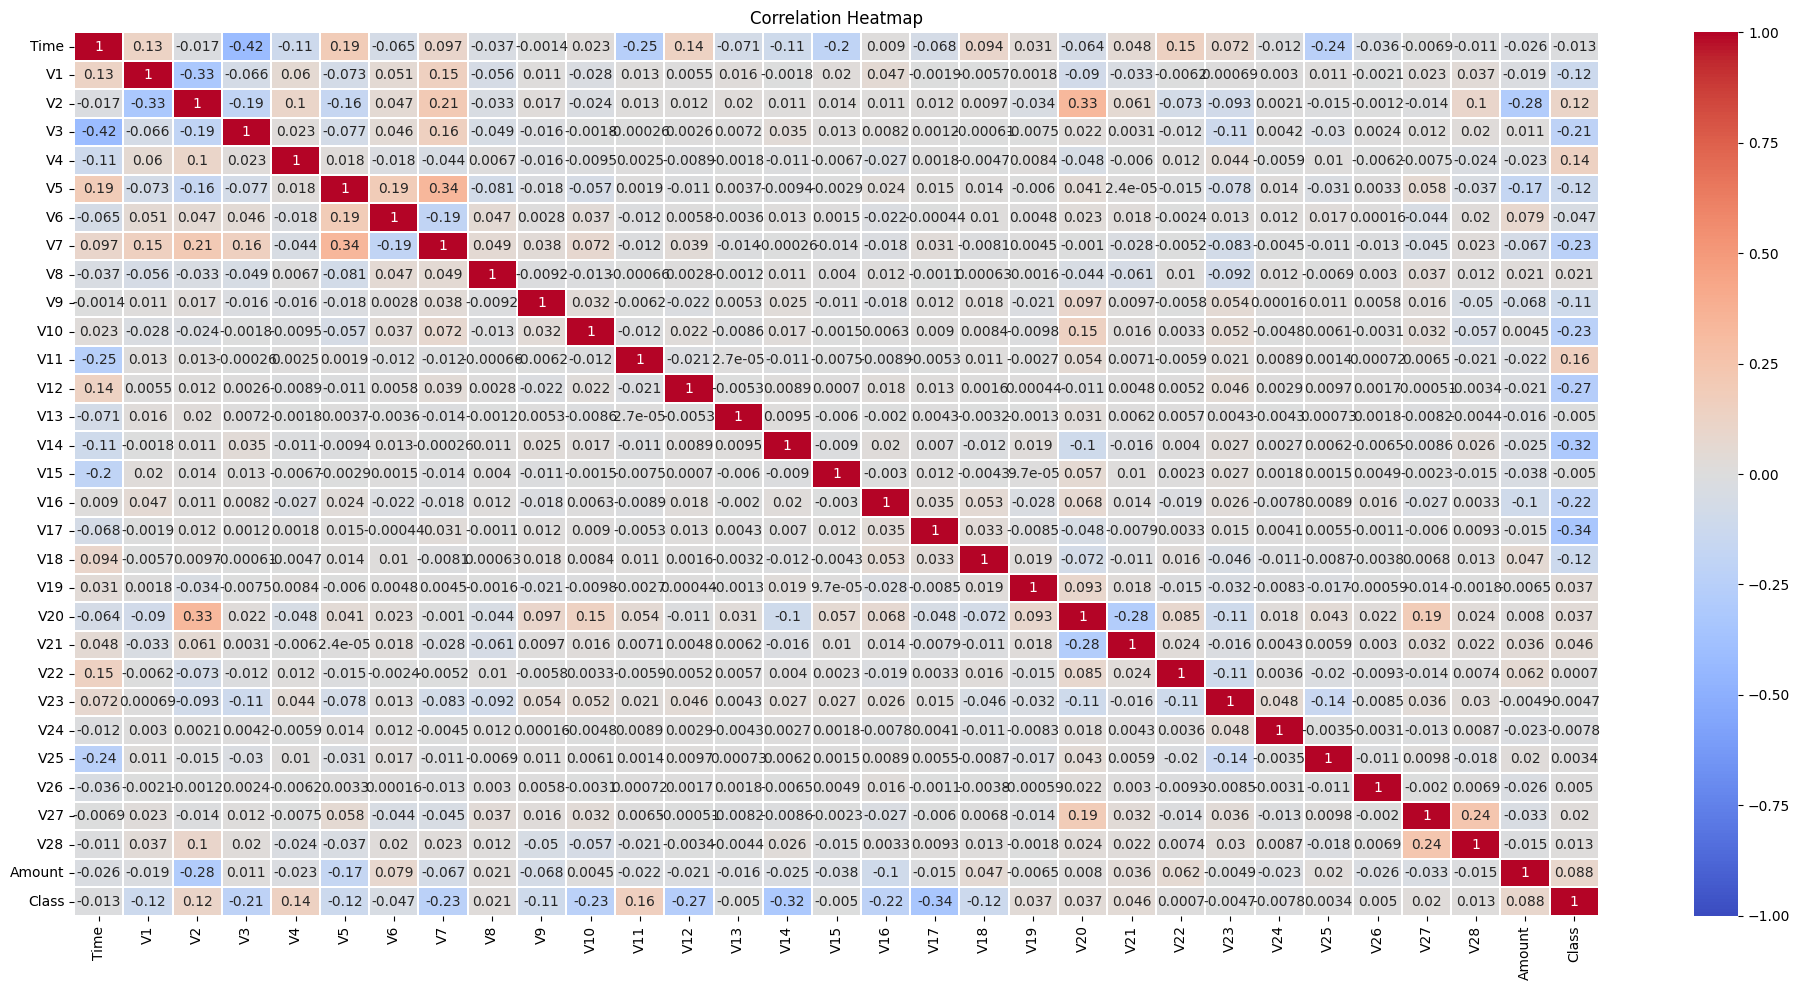

In [22]:
correlation_matrix = data.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths = 0.1)
plt.title('Correlation Heatmap')
plt.tight_layout()

no strong correlations

data is obviously very unbalanced so we'll be undersampling

basically means reducing amount of majority class to balance with minority class

In [23]:
from sklearn.utils import resample

In [24]:
majority_class = data[data['Class'] == 0]
minority_class = data[data['Class'] == 1]

undersampled_majority = resample(majority_class, replace=False, n_samples=2000, random_state=42)
data = pd.concat([undersampled_majority, minority_class])


In [25]:
data["Class"].value_counts()

0    2000
1     492
Name: Class, dtype: int64

In [26]:
data = data.sample(frac=1, random_state=42)

dimensionality reduction

In [27]:
from sklearn.manifold import TSNE
import numpy as np

In [28]:
x = data.drop(['Class'], axis = 1).values
y = data['Class'].values

In [29]:
p = TSNE(n_components=2, random_state=42).fit_transform(x)
p

array([[ 74.302475,  -3.795202],
       [ 58.58728 ,  18.474295],
       [-33.572582,   5.681822],
       ...,
       [-24.103178, -15.444356],
       [ 53.90316 , -19.798817],
       [ 20.160027,  30.639965]], dtype=float32)

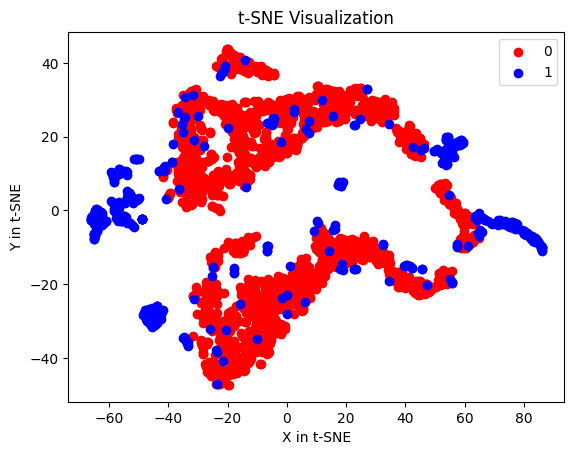

In [30]:
colormap ={0:'red', 1: 'blue'}
plt.figure()
for idx, cl in enumerate(np.unique(y)):
  plt.scatter(x = p[y==cl,0],
              y = p[y==cl,1],
              c = colormap[idx],
              label = cl)
plt.xlabel('X in t-SNE')
plt.ylabel('Y in t-SNE')
plt.legend()
plt.title('t-SNE Visualization')
plt.show()


there is some overlapping but not alot and alot of the fraud data points are quite distanced and clustered away from the nonfraud points

therefore no need to do anything about this we can move forward

**3.   Modeling**

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x = data.drop(['Class'], axis=1)
y = data['Class']

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [34]:
x_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
20688,8.669167,1.216203,-0.000491,0.661219,0.845733,-0.697166,-0.657026,-0.150301,-0.062256,0.622304,...,-0.149643,-0.304018,-0.744971,0.081013,0.392945,0.316226,0.182327,-0.019904,0.016422,9.99
283005,47.583889,2.004315,-0.135459,-1.018216,0.316560,-0.129973,-0.861653,0.042725,-0.145494,0.333027,...,-0.247091,-0.230586,-0.579104,0.349559,0.007354,-0.367878,0.179667,-0.073792,-0.070650,1.79
123,0.021667,-0.291241,1.515688,1.514355,2.518365,0.583648,0.425561,0.598690,0.056754,-1.475621,...,0.348232,-0.252659,-0.613055,-0.126407,-0.636697,-0.255688,0.019571,0.382581,0.194255,4.68
98749,18.554722,-1.025560,1.194885,0.961379,-0.075170,0.076468,-0.706655,0.393090,0.278348,-0.651828,...,0.042381,-0.201897,-0.567701,0.163714,-0.102235,-0.018292,0.095894,0.044170,0.029410,8.99
15840,7.579722,1.144751,0.044468,1.273891,2.808773,-0.668934,0.644241,-0.678497,0.286560,0.634228,...,-0.229123,-0.021660,0.254884,-0.180896,-0.096868,0.651567,0.247412,0.041835,0.020055,1.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118511,20.863333,1.187788,0.385758,0.417709,1.054997,-0.049011,-0.434166,0.174151,-0.119565,-0.146634,...,-0.105481,-0.134674,-0.298196,0.061577,0.077568,0.432858,-0.526274,0.041503,0.025360,6.66
279863,46.983889,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00
144754,23.993333,-0.670238,0.945206,0.610051,2.640065,-2.707775,1.952611,-1.624608,-5.229908,0.210202,...,1.474929,-2.504450,1.436472,0.351542,0.648467,0.579681,0.075738,0.346717,0.282209,323.77
151832,26.759167,2.021930,-0.204007,-1.259901,0.164870,0.413916,0.109697,-0.188783,-0.121963,2.070973,...,-0.169351,-0.034020,0.430970,0.001684,0.242744,0.234414,0.131919,-0.055957,-0.073639,15.13


In [35]:
x_test

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
110021,19.902222,-1.113263,0.686860,2.203666,0.040761,-0.661631,-0.440348,0.266698,-0.434540,0.684042,...,0.014696,0.185777,0.706075,-0.190756,0.842560,-0.355948,1.081597,-0.951044,0.017922,12.10
246463,42.550833,-2.158377,2.231523,-1.554718,-0.931530,-0.626945,-0.817064,-0.324636,1.392885,0.430389,...,0.179817,-0.289189,-0.828911,0.224017,-0.564312,-0.182558,0.185543,0.385323,0.202711,8.96
220414,39.488333,2.098232,-0.120009,-1.556132,0.138363,0.474125,-0.357738,0.133597,-0.197507,0.570249,...,-0.137225,-0.335204,-0.897051,0.270364,0.032881,-0.182849,0.206514,-0.079001,-0.057921,15.88
83209,16.592500,1.192397,0.065687,-0.270560,0.138943,-0.176464,-1.369103,0.589049,-0.467875,-0.297929,...,0.121420,0.003725,-0.072481,-0.156150,0.509810,0.557658,1.059685,-0.120304,0.004847,75.00
177533,34.226944,2.117252,-0.682116,-1.370400,-0.878884,-0.261191,-0.009385,-0.988418,0.065017,-0.326499,...,0.155650,0.276093,0.858247,0.060535,0.148294,-0.084761,-0.112072,0.028013,-0.016400,24.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
856,0.180556,-0.440732,1.032815,1.367832,-0.055192,0.156301,-0.301038,0.539671,0.203222,-0.660625,...,0.083396,-0.171483,-0.431693,0.031401,0.170349,-0.293095,0.071746,0.257613,0.086598,4.95
271624,45.739722,-1.686900,0.477078,0.323904,-3.203350,-0.882688,-0.430363,-0.443383,0.638059,-1.926384,...,-0.135263,-0.290880,-0.344656,-0.380024,0.435274,0.926276,-0.135085,0.080644,-0.156257,26.26
246968,42.613333,1.944373,-0.229404,-0.666059,1.671707,-0.347378,-0.418573,-0.142945,-0.005186,1.362874,...,-0.419124,-0.350666,-0.680077,0.260252,-0.090145,-0.011299,-0.810771,0.031751,-0.047261,7.48
188927,35.609167,1.989651,-0.763176,-0.358140,0.468312,-0.797885,-0.012115,-0.844585,-0.028073,-0.239733,...,-0.479255,-0.359722,-0.597362,0.273799,-0.806874,-0.431125,-0.810343,0.082364,-0.012697,65.00


In [36]:
y_train.value_counts()


0    1596
1     397
Name: Class, dtype: int64

In [37]:
y_test.value_counts()

0    404
1     95
Name: Class, dtype: int64

In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

In [39]:
def acc_report(actual,predicted):
    acc_score=accuracy_score(actual,predicted)
    cm_matrix=confusion_matrix(actual,predicted)
    class_rep=classification_report(actual,predicted)
    print('the accuracy of tha model is ',acc_score)
    print(cm_matrix)
    print(class_rep)

In [40]:
#Logistic Regression
lr = LogisticRegression()
lr.fit(x_train, y_train)
predlrtrain = lr.predict(x_train)
predlrtest = lr.predict(x_test)

acc_report(y_train, predlrtrain)
acc_report(y_test, predlrtest)

the accuracy of tha model is  0.9809332664325138
[[1591    5]
 [  33  364]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1596
           1       0.99      0.92      0.95       397

    accuracy                           0.98      1993
   macro avg       0.98      0.96      0.97      1993
weighted avg       0.98      0.98      0.98      1993

the accuracy of tha model is  0.9739478957915831
[[400   4]
 [  9  86]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       404
           1       0.96      0.91      0.93        95

    accuracy                           0.97       499
   macro avg       0.97      0.95      0.96       499
weighted avg       0.97      0.97      0.97       499



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [41]:
#Decision Tree
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
predttrain = dt.predict(x_train)
predttest = dt.predict(x_test)

acc_report(y_train, predttrain)
acc_report(y_test, predttest)

the accuracy of tha model is  1.0
[[1596    0]
 [   0  397]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1596
           1       1.00      1.00      1.00       397

    accuracy                           1.00      1993
   macro avg       1.00      1.00      1.00      1993
weighted avg       1.00      1.00      1.00      1993

the accuracy of tha model is  0.9679358717434869
[[400   4]
 [ 12  83]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       404
           1       0.95      0.87      0.91        95

    accuracy                           0.97       499
   macro avg       0.96      0.93      0.95       499
weighted avg       0.97      0.97      0.97       499



In [42]:
#Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
pred_rf_train = rf.predict(x_train)
pred_rf_test = rf.predict(x_test)

acc_report(y_train, pred_rf_train)
acc_report(y_test, pred_rf_test)

the accuracy of tha model is  1.0
[[1596    0]
 [   0  397]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1596
           1       1.00      1.00      1.00       397

    accuracy                           1.00      1993
   macro avg       1.00      1.00      1.00      1993
weighted avg       1.00      1.00      1.00      1993

the accuracy of tha model is  0.9779559118236473
[[404   0]
 [ 11  84]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       404
           1       1.00      0.88      0.94        95

    accuracy                           0.98       499
   macro avg       0.99      0.94      0.96       499
weighted avg       0.98      0.98      0.98       499



In [43]:
#Gradient Boosting Classifier
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)
predgbtrain = gb.predict(x_train)
predgbtest = gb.predict(x_test)

acc_report(y_train, predgbtrain)
acc_report(y_test, predgbtest)

the accuracy of tha model is  0.9989964877069744
[[1596    0]
 [   2  395]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1596
           1       1.00      0.99      1.00       397

    accuracy                           1.00      1993
   macro avg       1.00      1.00      1.00      1993
weighted avg       1.00      1.00      1.00      1993

the accuracy of tha model is  0.9779559118236473
[[402   2]
 [  9  86]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       404
           1       0.98      0.91      0.94        95

    accuracy                           0.98       499
   macro avg       0.98      0.95      0.96       499
weighted avg       0.98      0.98      0.98       499



In [44]:
#XGBoost Classifier
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
predxgbtrain = xgb.predict(x_train)
predxgbtest = xgb.predict(x_test)

acc_report(y_train, predxgbtrain)
acc_report(y_test, predxgbtest)

the accuracy of tha model is  1.0
[[1596    0]
 [   0  397]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1596
           1       1.00      1.00      1.00       397

    accuracy                           1.00      1993
   macro avg       1.00      1.00      1.00      1993
weighted avg       1.00      1.00      1.00      1993

the accuracy of tha model is  0.9739478957915831
[[402   2]
 [ 11  84]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       404
           1       0.98      0.88      0.93        95

    accuracy                           0.97       499
   macro avg       0.98      0.94      0.96       499
weighted avg       0.97      0.97      0.97       499



In [45]:
#SVM Classifier
svm = SVC()
svm.fit(x_train, y_train)
predsvmtrain = svm.predict(x_train)
predsvmtest = svm.predict(x_test)

acc_report(y_train, predsvmtrain)
acc_report(y_test, predsvmtest)

the accuracy of tha model is  0.9638735574510787
[[1596    0]
 [  72  325]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1596
           1       1.00      0.82      0.90       397

    accuracy                           0.96      1993
   macro avg       0.98      0.91      0.94      1993
weighted avg       0.97      0.96      0.96      1993

the accuracy of tha model is  0.9539078156312625
[[404   0]
 [ 23  72]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       404
           1       1.00      0.76      0.86        95

    accuracy                           0.95       499
   macro avg       0.97      0.88      0.92       499
weighted avg       0.96      0.95      0.95       499



all the models are extremely promising however random forest and gradient boost have outperformed with a 98% accuracy